# 1. Missing values and imputation


**Source of missing values:**

* Data Extraction: It is possible that there are problems with extraction process. In such cases, we should double-check for correct data with data guardians. Some hashing procedures can also be used to make sure that data extraction is correct. Errors at data extraction stage are typically easy to find and can be corrected easily as well.
* Data collection: These errors occur at time of data collection and are harder to correct. They can be categorized in four types:
>* Missing completely at random: This is a case when the probability of missing variable is same for all observations. For example: respondents of data collection process decide that they will declare their earning after tossing a fair coin. If an head occurs, respondent declares his / her earnings & vice versa. Here each observation has equal chance of missing value.
>* Missing at random: This is a case when variable is missing at random and missing ratio varies for different values / level of other input variables. For example: We are collecting data for age and female has higher missing value compare to male.
>* Missing that depends on unobserved predictors: This is a case when the missing values are not random and are related to the unobserved input variable. For example: In a medical study, if a particular diagnostic causes discomfort, then there is higher chance of drop out from the study. This missing value is not at random unless we have included “discomfort” as an input variable for all patients.
>* Missing that depends on the missing value itself: This is a case when the probability of missing value is directly correlated with missing value itself. For example: People with higher or lower income are likely to provide non-response to their earning.

We are going to use the Titanic dataset again in this tutorial to explore missing data.

In [ ]:
# from google.colab import drive
drive.mount('/content/drive')

In [ ]:
#import library
import pandas as pd
import numpy as np

In [ ]:
root_path = '/content/drive/Shareddrives/FIT5196_S2_2025/week8/'

In [ ]:
#load the data
root_path = '.'
titanic_passenger_df = pd.read_csv(f'{root_path}/titanic passenger list.csv')

We would normally check some data basics before analysis, such as
* length (rows)
* width (or columns)
* column types
* basic stats
* head & tail of data

We will skip this step in this tutorial.

## 1.1 Check missing values


`info()`
* tells us total number of records
* gives us details on datatype, 'object' here means string, the others are int and float
* also include see 'non-null' observations for each data column

`describe()` by default tabulates numeric data, which report on:
* descriptive statistics
* number of non-null observations in "count"
* with "include='all'" will include all columns and "include=['O']" will include objects

`.isnull().sum()`
* will return sum of missing values for each column

In [ ]:
titanic_passenger_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


There are 1309 x 14 records and there are many missing values in `age`,`fare` (one record) `cabin`, `boat`, `body` and `home.dest`.

In [ ]:
titanic_passenger_df.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881138,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413493,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [ ]:
titanic_passenger_df.describe(include=['O']) # 'O' for Objects

,name,sex,ticket,cabin,embarked,boat,home.dest
count,1309,1309,1309,295,1307,486,745
unique,1307,2,929,186,3,27,369
top,"Connolly, Miss. Kate",male,CA. 2343,C23 C25 C27,S,13,"New York, NY"
freq,2,843,11,6,914,39,64


In [ ]:
titanic_passenger_df.describe(include='all')

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
count,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307,486,121.000000,745
unique,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3,27,NaN,369
top,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,13,NaN,"New York, NY"
freq,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914,39,NaN,64
mean,2.294882,0.381971,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN,NaN,160.809917,NaN
std,0.837836,0.486055,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN,NaN,97.696922,NaN
min,1.000000,0.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,1.000000,NaN
25%,2.000000,0.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,72.000000,NaN
50%,3.000000,0.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,155.000000,NaN
75%,3.000000,1.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN,NaN,256.000000,NaN


In [ ]:
titanic_passenger_df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64


<span style="color:red">Which of these are potentially imputatable i.e. we can derive values from existing data?
</span>

### 1.1.1 Investigate with missing values for ages

Titanic data is commonly used for predictive analytics, e.g. remove the 'survived' column and feed the other data into an algorithm to see if there are any predictors for survival, pclass was a factor, also gender, age another (and if you ever go on a cruise ship change your name to "Womenandchildren").

Age are mostly missing. Should we just delete or do something basic like:  

meanAge = np.mean(df1.age)

df1.age = df1.age.fillna(meanAge)

**Discussion**:

* **What's wrong with this approach?**

* **What is the average age anyway?**

*  **What is the average age for males, for females? Is that an improvement?**


In [ ]:
np.mean(titanic_passenger_df.age)

29.881137667304014

In [ ]:
# age - we know there are some missing, let's dig deeper
titanic_passenger_df['age'].value_counts()

age
24.00    47
22.00    43
21.00    41
30.00    40
18.00    39
         ..
0.33      1
22.50     1
70.50     1
0.67      1
26.50     1
Name: count, Length: 98, dtype: int64

In [ ]:
# mostly younger, 20s to 30s
titanic_passenger_df['age'].unique()

array([29.  ,  0.92,  2.  , 30.  , 25.  , 48.  , 63.  , 39.  , 53.  ,
       71.  , 47.  , 18.  , 24.  , 26.  , 80.  ,   nan, 50.  , 32.  ,
       36.  , 37.  , 42.  , 19.  , 35.  , 28.  , 45.  , 40.  , 58.  ,
       22.  , 41.  , 44.  , 59.  , 60.  , 33.  , 17.  , 11.  , 14.  ,
       49.  , 76.  , 46.  , 27.  , 64.  , 55.  , 70.  , 38.  , 51.  ,
       31.  ,  4.  , 54.  , 23.  , 43.  , 52.  , 16.  , 32.5 , 21.  ,
       15.  , 65.  , 28.5 , 45.5 , 56.  , 13.  , 61.  , 34.  ,  6.  ,
       57.  , 62.  , 67.  ,  1.  , 12.  , 20.  ,  0.83,  8.  ,  0.67,
        7.  ,  3.  , 36.5 , 18.5 ,  5.  , 66.  ,  9.  ,  0.75, 70.5 ,
       22.5 ,  0.33,  0.17, 40.5 , 10.  , 23.5 , 34.5 , 20.5 , 30.5 ,
       55.5 , 38.5 , 14.5 , 24.5 , 60.5 , 74.  ,  0.42, 11.5 , 26.5 ])

Notice the 'nan' above, it doesn't occur in counts()

**Discussion**:
*  How many 'NaN' values for age are there?
*  How many 0?
*  How many < 1?
*  What does 'NaN' mean?
*  Is NaN == NaN true in Python?

In [ ]:
titanic_passenger_df[titanic_passenger_df['age'].isnull()].head() # look at some

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
15,1,0,"Baumann, Mr. John D",male,NaN,0,0,PC 17318,25.9250,NaN,S,NaN,NaN,"New York, NY"
37,1,1,"Bradley, Mr. George (""George Arthur Brayton"")",male,NaN,0,0,111427,26.5500,NaN,S,9,NaN,"Los Angeles, CA"
40,1,0,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,NaN,C,NaN,NaN,"Philadelphia, PA"
46,1,0,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.0000,NaN,S,NaN,NaN,NaN
59,1,1,"Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genev...",female,NaN,0,0,17770,27.7208,NaN,C,5,NaN,"New York, NY"


In [ ]:
titanic_passenger_df[titanic_passenger_df['age'] < 1]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
359,2,1,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S,13,NaN,"Bangkok, Thailand / Roseville, IL"
427,2,1,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S,4,NaN,"Detroit, MI"
548,2,1,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,S,4,NaN,"Cornwall / Akron, OH"
590,2,1,"West, Miss. Barbara J",female,0.92,1,2,C.A. 34651,27.7500,NaN,S,10,NaN,"Bournmouth, England"
611,3,1,"Aks, Master. Philip Frank",male,0.83,0,1,392091,9.3500,NaN,S,11,NaN,"London, England Norfolk, VA"
657,3,1,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C,C,NaN,"Syria New York, NY"
658,3,1,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C,C,NaN,"Syria New York, NY"
747,3,0,"Danbom, Master. Gilbert Sigvard Emanuel",male,0.33,0,2,347080,14.4000,NaN,S,NaN,NaN,"Stanton, IA"
763,3,1,"Dean, Miss. Elizabeth Gladys ""Millvina""",female,0.17,1,2,C.A. 2315,20.5750,NaN,S,10,NaN,"Devon, England Wichita, KS"


**What does age = 0.17 mean?**

<Axes: >

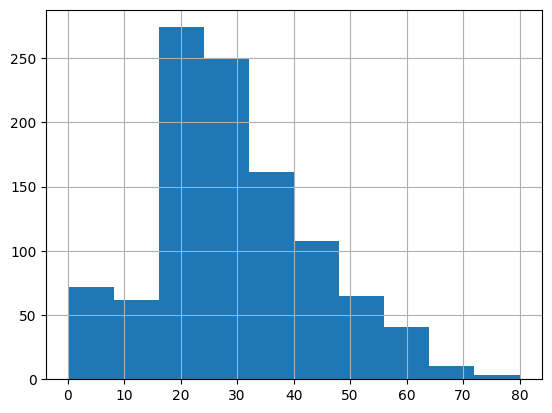

In [ ]:
%matplotlib inline
titanic_passenger_df['age'].hist()

In [ ]:
sum(titanic_passenger_df['age'].isnull())
# 263 passengers have no age recorded.

263

**Let's look at other factors, e.g. names can give a clue because most passengers seem to have a title (e.g. 'Mrs')**

**Discussion**:

* Can we assume that 'Mrs' implies married (implies not a child)?

* What about 'Miss' or 'Ms'?


In [ ]:
# Look into titles, e.g. 'Mrs' implies married (implies not child)
def name_extract(word):
     return word.split(',')[1].split('.')[0].strip()

# because names are in this format:
# Allison, Master. Hudson Trevor
# we can split on ','
# then '.'

In [ ]:
temp = pd.DataFrame({'Title':titanic_passenger_df['name'].apply(name_extract)}) # testing, apply the method to the data
# check unique values
temp['Title'].unique()

array(['Miss', 'Master', 'Mr', 'Mrs', 'Col', 'Mme', 'Dr', 'Major', 'Capt',
       'Lady', 'Sir', 'Mlle', 'Dona', 'Jonkheer', 'the Countess', 'Don',
       'Rev', 'Ms'], dtype=object)

In [ ]:
# a couple of strange ones but most of the standard titles are there
temp['Title'].value_counts()

Title
Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Ms                2
Major             2
Capt              1
Sir               1
Dona              1
Jonkheer          1
the Countess      1
Don               1
Mme               1
Lady              1
Name: count, dtype: int64

In [ ]:
# did we miss any?
sum(temp['Title'].value_counts())

1309

**That worked really well, we have titles for everyone and there are only a few strange ones**:

- Someone look up 'Jonkheer' (and Dona - Spanish?)

- So what can we say about 'Master'? Usually refers to boys?

- Dr, Rev, Col, Major, Capt, Sir, Don, would all be adults?

Let's go ahead and apply this transformation:

In [ ]:
titanic_passenger_df_copy = titanic_passenger_df.copy() # copy then insert new column
titanic_passenger_df_copy['Title'] = titanic_passenger_df['name'].apply(name_extract)
titanic_passenger_df_copy.head() # title at far right

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Master
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Mrs


In [ ]:
# just check (again) we got most of them
titanic_passenger_df_copy[titanic_passenger_df_copy['Title'].isnull()]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Title


**First let's check distribution of missing values across different titles**

In [ ]:
titanic_passenger_df_copy[titanic_passenger_df_copy.age.isnull()].Title.value_counts()

Title
Mr        176
Miss       50
Mrs        27
Master      8
Dr          1
Ms          1
Name: count, dtype: int64

**We will first investigate missing values in doctors**

In [ ]:
titanic_passenger_df_copy[titanic_passenger_df_copy['Title'] == "Dr"]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Title
40,1,0,"Brewe, Dr. Arthur Jackson",male,NaN,0,0,112379,39.6000,NaN,C,NaN,NaN,"Philadelphia, PA",Dr
93,1,1,"Dodge, Dr. Washington",male,53.0,1,1,33638,81.8583,A34,S,13,NaN,"San Francisco, CA",Dr
119,1,1,"Frauenthal, Dr. Henry William",male,50.0,2,0,PC 17611,133.6500,NaN,S,5,NaN,"New York, NY",Dr
181,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S,8,NaN,"New York, NY",Dr
206,1,0,"Minahan, Dr. William Edward",male,44.0,2,0,19928,90.0000,C78,Q,NaN,230.0,"Fond du Lac, WI",Dr
278,1,1,"Stahelin-Maeglin, Dr. Max",male,32.0,0,0,13214,30.5000,B50,C,3,NaN,"Basel, Switzerland",Dr
508,2,0,"Moraweck, Dr. Ernest",male,54.0,0,0,29011,14.0000,NaN,S,NaN,NaN,"Frankfort, KY",Dr
525,2,0,"Pain, Dr. Alfred",male,23.0,0,0,244278,10.5000,NaN,S,NaN,NaN,"Hamilton, ON",Dr


Drs are mostly older (except for Dr Pain - hah)

**What's the average age of Drs?**

In [ ]:
titanic_passenger_df_copy[titanic_passenger_df_copy['Title'] == "Dr"]['age'].mean()

43.57142857142857

The average age for all passengers is 29, for Drs it's 43, an improvement in fidelity?


In [ ]:
titanic_passenger_df_copy[(titanic_passenger_df_copy['Title'] == "Dr") & (titanic_passenger_df_copy['sex'] == "male")]['age'].mean()

42.666666666666664

no missing values so move on.

**Your turn, look at 'Maj' and any other titles that suggest age**


**Missing values: ages for boys**

It seems, in this era (pre Jackie Chan), Master did mean boys

In [ ]:
titanic_passenger_df_copy[titanic_passenger_df_copy['Title'] == "Master"] # how many?

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,Title
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",Master
54,1,1,"Carter, Master. William Thornton II",male,11.00,1,2,113760,120.0000,B96 B98,S,4,NaN,"Bryn Mawr, PA",Master
94,1,1,"Dodge, Master. Washington",male,4.00,0,2,33638,81.8583,A34,S,5,NaN,"San Francisco, CA",Master
249,1,1,"Ryerson, Master. John Borie",male,13.00,2,2,PC 17608,262.3750,B57 B59 B63 B66,C,4,NaN,"Haverford, PA / Cooperstown, NY",Master
273,1,1,"Spedden, Master. Robert Douglas",male,6.00,0,2,16966,134.5000,E34,C,3,NaN,"Tuxedo Park, NY",Master
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,3,0,"Skoog, Master. Karl Thorsten",male,10.00,3,2,347088,27.9000,NaN,S,NaN,NaN,NaN,Master
1240,3,1,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C,16,NaN,NaN,Master
1256,3,1,"Touma, Master. Georges Youssef",male,7.00,1,1,2650,15.2458,NaN,C,C,NaN,NaN,Master
1262,3,0,"van Billiard, Master. James William",male,NaN,1,1,A/5. 851,14.5000,NaN,S,NaN,NaN,NaN,Master


In [ ]:
#there are a lot, 61, use describe()
titanic_passenger_df_copy[titanic_passenger_df_copy['Title'] == "Master"].describe() # min age is 0.33 (4 months?), max is 14.5, mean is 5.5

,pclass,survived,age,sibsp,parch,fare,body
count,61.000000,61.000000,53.000000,61.000000,61.000000,61.000000,3.00000
mean,2.655738,0.508197,5.482642,2.049180,1.377049,36.008195,24.00000
std,0.629424,0.504082,4.161554,1.961515,0.552688,40.677102,37.26929
min,1.000000,0.000000,0.330000,0.000000,0.000000,3.170800,1.00000
25%,2.000000,0.000000,2.000000,1.000000,1.000000,15.245800,2.50000
50%,3.000000,1.000000,4.000000,1.000000,1.000000,26.000000,4.00000
75%,3.000000,1.000000,9.000000,4.000000,2.000000,36.750000,35.50000
max,3.000000,1.000000,14.500000,8.000000,2.000000,262.375000,67.00000


In [ ]:
titanic_passenger_df_copy[titanic_passenger_df_copy['Title'] == "Master"]['age'].mean()

5.482641509433962

### 1.1.2 Discussion

* How many boys don't have an age?
* What does describe() (above) tell us about pclass, sibsp, parch?
* Do any children not have any siblings or parents travelling with them?
* Any other factors that can help determine (or impute) age?



## 1.2 Mean imputation of age by title

In this task you need to calculate the mean age for each title group and use the imputed values to replace the missing values in the corresponding group.

In [ ]:
# this seems too easy, is it right?
titanic_passenger_df_copy["age"].fillna(titanic_passenger_df_copy.groupby("Title")["age"].transform("mean"), inplace=True)
titanic_passenger_df_copy.age.describe()

count    1309.000000
mean       29.896894
std        13.193803
min         0.170000
25%        21.774238
50%        30.000000
75%        36.000000
max        80.000000
Name: age, dtype: float64

In [ ]:
titanic_passenger_df_copy.groupby("Title").aggregate('age').mean()

Title
Capt            70.000000
Col             54.000000
Don             40.000000
Dona            39.000000
Dr              43.571429
Jonkheer        38.000000
Lady            48.000000
Major           48.500000
Master           5.482642
Miss            21.774238
Mlle            24.000000
Mme             24.000000
Mr              32.252151
Mrs             36.994118
Ms              28.000000
Rev             41.250000
Sir             49.000000
the Countess    33.000000
Name: age, dtype: float64

In [ ]:
test_df = pd.DataFrame({
    "Date": [
        "2015-05-08", "2015-05-07", "2015-05-06", "2015-05-05",
        "2015-05-08", "2015-05-07", "2015-05-06", "2015-05-05"],
    "Data": [5, 8, 6, 1, 50, 100, 60, 120],
})

In [ ]:

test_df.groupby('Date')['Data'].transform('sum')

0     55
1    108
2     66
3    121
4     55
5    108
6     66
7    121
Name: Data, dtype: int64

In [ ]:
test_df

,Date,Data
0,2015-05-08,5
1,2015-05-07,8
2,2015-05-06,6
3,2015-05-05,1
4,2015-05-08,50
5,2015-05-07,100
6,2015-05-06,60
7,2015-05-05,120


# 2. Case Study: Handling Missing Values in the Boston Dataset

In [ ]:
# ignore the warning, FutureWarning
import warnings
warnings.filterwarnings("ignore")

From the previous section, we have seen that the Titanic dataset contains missing values in the 'Age' column. In this section, we will impute the missing values using the `LinearRegression` model.

To better illustrate the imputation process, we will use the `boston` dataset from the `sklearn.datasets` module. The `boston` dataset contains 13 features and 506 samples. We will introduce missing values to the `boston` dataset and then impute the missing values using the `LinearRegression` model.

In [ ]:
from sklearn.datasets import fetch_openml
boston = fetch_openml(name="boston", version=1, as_frame=True)
print(boston.data.shape, boston.target.shape)

(506, 13) (506,)


In [ ]:
boston.data.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [ ]:
print(boston.DESCR)

**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.
Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10

**Note**:

The `load_boston()` dataset was removed from scikit-learn in version `1.2` due to ethical concerns. The Boston Housing dataset is available on `OpenML`, and you can load it using the `fetch_openml` function from `scikit-learn` as shown above.


Alternatively, you can using `pd.read_pickle` to read the modified `boston` dataset we have provided.

In [ ]:
boston_df = pd.read_pickle(f'{root_path}/boston_df.p')
print(boston_df.shape)

(506, 14)


In [ ]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,y
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**This dataset has no missing values**

We will select a feature to degrade (remove some values as missing data).

In [ ]:
boston_df.data = boston_df.iloc[:,:-1]
boston_df.target = boston_df.iloc[:,-1:]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(boston_df.data,boston_df.target, random_state = 1)
print(X_train.shape, X_test.shape)

(379, 13) (127, 13)


These testing and training sets form our full dataset, we have prepared some data with missing vaues.

## 2.1 NA values in the AGE column

proportion of owner-occupied units built prior to 1940

In [ ]:
# read in the data
boston_dropna_df = pd.read_pickle(f'{root_path}/boston_dropna_df.p')
print(boston_dropna_df.shape)

(379, 14)


In [ ]:
boston_impute_df = boston_dropna_df.copy()
print(boston_dropna_df['AGE'].isnull().sum(), boston_impute_df['AGE'].isnull().sum())

95 95


In [ ]:
boston_dropna_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,y
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,284.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,3.778797,11.521108,11.220053,0.081794,0.554073,6.255726,68.688380,3.824433,9.525066,405.182058,18.478100,358.304802,12.936174,22.344591
std,9.370541,23.492644,6.875362,0.274413,0.117825,0.687415,28.673895,2.138449,8.734550,169.483657,2.141433,89.601791,7.243381,8.920931
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.083475,0.000000,5.255000,0.000000,0.447500,5.875000,44.675000,2.094450,4.000000,277.000000,17.400000,376.125000,7.165000,17.100000
50%,0.245220,0.000000,9.690000,0.000000,0.538000,6.172000,79.900000,3.317500,5.000000,329.000000,19.100000,392.040000,11.970000,20.800000
75%,3.621175,17.750000,18.100000,0.000000,0.624000,6.611000,93.825000,5.108550,24.000000,666.000000,20.200000,396.220000,17.135000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**`boston_dropna_df` will be a dataset to see what would happen if we just dropped rows with missing values**

In [ ]:
boston_dropna_df.dropna(subset=['AGE'],axis=0,inplace=True)

In [ ]:
boston_dropna_df['AGE'].isnull().sum()

0

In [ ]:
print(boston_dropna_df.shape, boston_impute_df['AGE'].isnull().sum())

(284, 14) 95


**Discussion**

- Why did I show you that `boston_impute_df` didn't change when I changed `boston_dropna_df`?

- What would have happened if I created a copy without the `.copy()` method?

- How about using `boston_impute_df = boston_dropna_df`?

In [ ]:
boston_dropna_df.shape

(284, 14)

In [ ]:
boston_dropna_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,y
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
10,0.22489,12.5,7.87,0.0,0.524,6.377,94.3,6.3467,5.0,311.0,15.2,392.52,20.45,15.0


## 2.2 Impute missing values using Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

We will compare the performance of this model with the imputed and complete models.
Now we need to train a linear regression model and predict the `AGE` values for the `boston_impute_df`

Should we include the `price` in the training data for the imputation?

In [ ]:
lm_fitting_df = boston_dropna_df.drop('y',axis=1)
lm_fitting_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
10,0.22489,12.5,7.87,0.0,0.524,6.377,94.3,6.3467,5.0,311.0,15.2,392.52,20.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,0.28960,0.0,9.69,0.0,0.585,5.390,72.9,2.7986,6.0,391.0,19.2,396.90,21.14
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6.0,391.0,19.2,395.77,15.10
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6.0,391.0,19.2,396.90,14.33
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08


Our target now is the `AGE` column, we will use the `boston_dropna_df` as the data to fit, we can use data with missing values to train a model.

In [ ]:
lm_for_impute = LinearRegression()

In [ ]:
lm_for_impute.fit(lm_fitting_df[[x for x in lm_fitting_df.columns if x != 'AGE']],lm_fitting_df['AGE']) #fit

LinearRegression()

In [ ]:
boston_impute_df[boston_impute_df['AGE'].isnull()].head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,y
7,0.14455,12.5,7.87,0.0,0.524,6.172,NaN,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,NaN,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,NaN,6.5921,5.0,311.0,15.2,386.71,17.10,18.9
22,1.23247,0.0,8.14,0.0,0.538,6.142,NaN,3.9769,4.0,307.0,21.0,396.90,18.72,15.2
49,0.21977,0.0,6.91,0.0,0.448,5.602,NaN,6.0877,3.0,233.0,17.9,396.90,16.20,19.4


In [ ]:
lm_for_impute.predict(boston_impute_df.drop(['AGE','y'],axis=1))

array([ 55.54169435,  55.07036138,  52.62921279,  44.74737697,
        60.03002858,  70.11902496,  53.45354189,  60.7868362 ,
        56.71243725,  61.59536671,  66.10198784,  62.29115387,
        60.47460428,  68.72231216,  80.16101352,  72.0958641 ,
        79.32670387,  78.48991559,  73.07135463,  71.53859011,
        69.2665315 ,  74.83191928,  71.38293247,  80.76981887,
        89.82952408,  77.57092755,  64.08732792,  65.72801111,
        59.69618849,  62.43967841,  38.2300336 ,  46.30085778,
        48.21844208,  50.07775903,  55.55916465,  70.6686775 ,
        52.32604158,  42.75988831,  38.50707539,  35.35046262,
        36.64148452,  40.35396953,  21.50470684,  16.97045822,
        16.00616149,  39.71182774,  42.23958175,  47.0534663 ,
        39.24097878,  31.26427789,  43.04394218,  39.15922121,
        47.29790301,  48.91127757,  43.95572658,  47.44971127,
        52.45806176,  54.02131554,  60.01513769,  56.95081278,
        52.06359895,  44.92205754,  46.78507719,  44.51

In [ ]:
boston_impute_df['AGE'][boston_impute_df['AGE'].isnull()] = lm_for_impute.predict(boston_impute_df.drop(['AGE','y'],axis=1))

<Axes: >

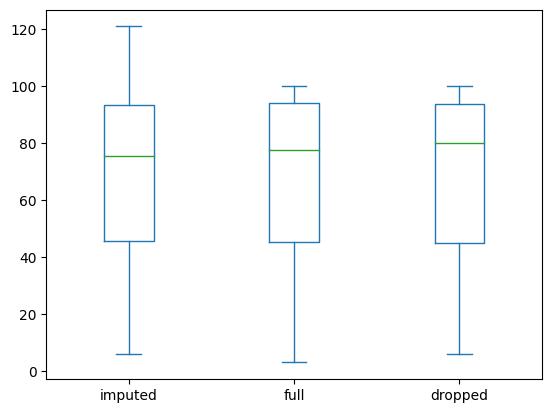

In [ ]:
boxplot = pd.DataFrame({'imputed': boston_impute_df['AGE'],'full': boston_df['AGE'],'dropped': boston_dropna_df['AGE']})
boxplot.plot(kind='box')

So these are the imputed values predicted by the lm trained on the data we did have a value for `AGE` for?

## 2.3 Price Prediction

In [ ]:
def train_and_test_lm(lm, X_train, X_test, y_train, y_test):
    lm.fit(X_train,y_train)
    train_score = lm.score(X_train,y_train)
    test_score = lm.score(X_test,y_test)
    return train_score, test_score

### 2.3.1 Predicting Price with the Full Dataset

\begin{equation}
y_i = \beta_0 + \beta_1 X_i + \epsilon_i
\end{equation}

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(boston_df.data, boston_df.target,random_state=111)
shapes = map(np.shape, [X_train, X_test, y_train, y_test])
print(list(shapes))

[(379, 13), (127, 13), (379, 1), (127, 1)]


In [ ]:
lm_full = LinearRegression()
# train and test the model
train_r_squared, test_r_squared = train_and_test_lm(lm_full, X_train, X_test, y_train, y_test)
print(f'For the Full Dataset, Train R^2: {train_r_squared:.5f}, Test R^2: {test_r_squared:.5f}')

For the Full Dataset, Train R^2: 0.72816, Test R^2: 0.75928


### 2.3.2 Predicting Price with the Droped Dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(boston_dropna_df.iloc[:,:-1],boston_dropna_df.iloc[:,-1:],random_state=111)

In [ ]:
lm_dropped = LinearRegression()
# train and test the model
train_r_squared, test_r_squared = train_and_test_lm(lm_dropped, X_train, X_test, y_train, y_test)
print(f'For the Dropped Dataset, Train R^2: {train_r_squared:.5f}, Test R^2: {test_r_squared:.5f}')

For the Dropped Dataset, Train R^2: 0.72594, Test R^2: 0.62193


### 2.3.3 Predicting Price with the Imputed Dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(boston_impute_df.iloc[:,:-1],boston_impute_df.iloc[:,-1:],random_state=111)

In [ ]:
lm_impute = LinearRegression()
# train and test the model
train_r_squared, test_r_squared = train_and_test_lm(lm_impute, X_train, X_test, y_train, y_test)
print(f'For the Imputed Dataset, Train R^2: {train_r_squared:.5f}, Test R^2: {test_r_squared:.5f}')

For the Imputed Dataset, Train R^2: 0.70787, Test R^2: 0.73371


## 2.4 Reference

From [adventures-in-statistics](http://blog.minitab.com/blog/adventures-in-statistics/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit)

- What Is R-squared?

R-squared is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression.

The definition of R-squared is fairly straight-forward; it is the percentage of the response variable variation that is explained by a linear model. Or:

R-squared = Explained variation / Total variation

R-squared is always between 0 and 100%:

0% indicates that the model explains none of the variability of the response data around its mean.
100% indicates that the model explains all the variability of the response data around its mean.

# 3. How to Identify and Remove Outliers?

In this section, we will discuss how to identify and remove outliers from the dataset. Outliers are data points that significantly differ from other data points in the dataset. Outliers can affect the performance of machine learning models, and it is essential to identify and remove them before training the model.

We use the same example of Titanic passengers dataset.

In [ ]:
titanic_passenger_df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


## 3.1 Outlier Detection

In this task, please use `boxplot` (boxes and whiskers plot) from `matplotlib` to investigate possible data outliers.

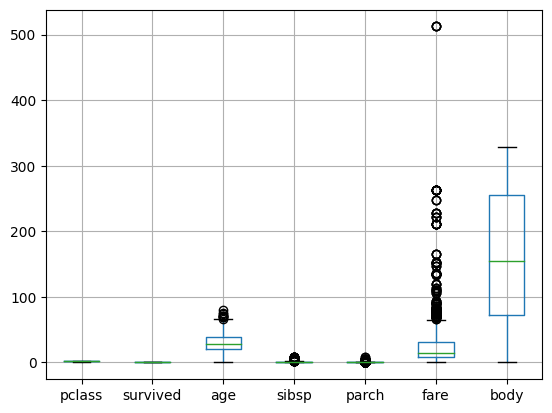

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
boxplot = titanic_passenger_df.boxplot()

From above figure, the first thing to notice is that `fare` has many outliers.

However, plotting all data together might not be right because of teh different ranges of attributes. Therefore, we look at one attribute at a time instead.

## 3.2 Investigate Outliers

Since `fare` has many outliers, we will investigate the `fare` attribute first.

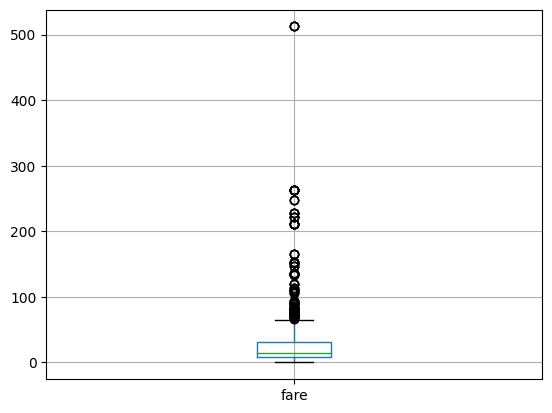

In [ ]:
fare_bp = titanic_passenger_df.boxplot(column='fare')

In [ ]:
# We can see a bunch of fares above 200, then something around 500, look at the outliers:
titanic_passenger_df[titanic_passenger_df['fare'] > 500]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
49,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,3,NaN,"Austria-Hungary / Germantown, Philadelphia, PA"
50,1,1,"Cardeza, Mrs. James Warburton Martinez (Charlo...",female,58.0,0,1,PC 17755,512.3292,B51 B53 B55,C,3,NaN,"Germantown, Philadelphia, PA"
183,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,3,NaN,NaN
302,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,3,NaN,NaN


In [ ]:
# fare of 512.3292 looks very high compared to other, that's a weird value too, did they split the cost?
# or was it just the one ticket?
512.3292 * 4

2049.3168


It is still a weird value, what's `0.3292` or `0.3168` of a pound? Neither make sense in old currency (pounds, shillings and pence) e.g. £512.32s.92d because...

There were twenty (20) shillings per pound and the shilling was divided into twelve (12) pennies.(so 32s = £1.12s and 92 pennies is... carry the 4... heaps)
Maybe someone converted to dollars?? Adjusted for inflation?
Hard to say if these are 'bad' outliers, class is 1st, they have 4 cabins, maybe they're just big spenders in a reasonable trawl of the internet most posts just ignore this e.g. "There were 4 people who paid the most expensive ticket that cost £512.3292"

Mrs James Warburton Martinez Cardeza (Charlotte Wardle Drake), 58, from Germantown, PA,
boarded the Titanic at Cherbourg with her son Thomas and her maid Anna Ward.
They occupied suite B-51/53/55 (ticket number17755, £512, 6s).
http://www.encyclopedia-titanica.org/titanic-survivor/charlotte-cardeza.html
"with his mother Charlotte Cardeza and his manservant Gustave Lesueur"
    
Anna: "She worked as personal maid and companion to Mrs Charlotte Cardeza."

In [ ]:
# so how do you get 512.3292 from £512, 6s
# 6shillings is ~1/3 pound?
# 6/20 is 0.3 so that may explain the 0.3292..
def poundit(p,s,d):
    return p + (d / 12.0 + s) / 20
# force the 12.0 not the 20!
# There were 20 shillings per pound and the shilling was divided into 12 pennies.

In [ ]:
poundit(512,6,0) # £512, 6s

512.3

So 512.3 is a real value.

**Discussion**:
- Is there any problem with this value?
- Should we treat it as an outlier?

**Let's investigate outliers by each class.**

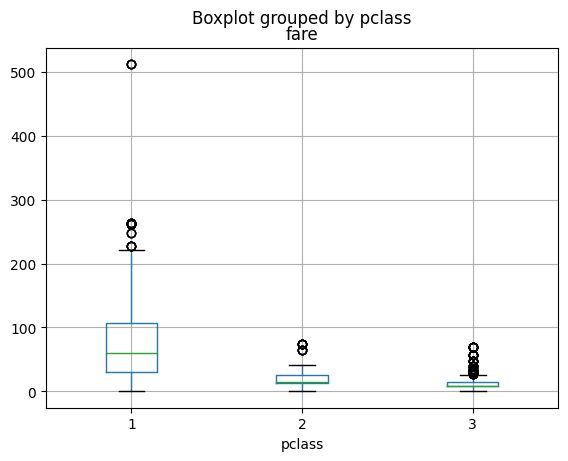

In [ ]:
# plot by class
bp = titanic_passenger_df.boxplot(column='fare', by = 'pclass')

## 3.3 Discussion:
- Are the number of outliers reported reduced?
- Are there other factors that are impacting on the outliers ?